# Plot contact distance

The contact distance plot is often used to see the global difference in contact frequency at the different scales between samples.
This notebook shows the script to display different types of contact frequency plots.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Specify samples to plot
samplelist = ['Control', 'siCTCF', 'siRad21']

Here we use `distance_vs_count.MAPQ30.txt` in the `distance` directory.

(Note: This filename was changed in v1.9.0. If you are using CustardPy v1.8.0 or earlier, use `distance_vs_count.10kb.MAPQ30.txt` instead).

Create `Jdata` object containing the distribution data of all samples. 

In [3]:
dfarray = []
for sample in samplelist:
    path = f'CustardPyResults_Hi-C/Juicer_hg38/{sample}/distance/distance_vs_count.MAPQ30.txt'
    df = pd.read_csv(path, sep="|", header=None, index_col=0)
    df_normalized = df / df.sum()
    df_normalized.columns = [sample]
    dfarray.append(df_normalized)

Jdata = pd.concat(dfarray, axis=1)
Jdata.index = [n * 10000 for n in range(1, len(Jdata) + 1)]

Jdata = Jdata.T

In [4]:
logJdata = np.log10(Jdata)
logJdata

/work3/miniconda3_py310/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,...,49530000,49540000,49550000,49560000,49570000,49580000,49590000,49600000,49610000,49620000
Control,-0.421224,-1.149222,-1.330263,-1.451928,-1.548873,-1.631883,-1.706374,-1.774436,-1.836290,-1.894641,...,-8.504383,-8.504383,-8.504383,-8.027261,-7.902323,-8.027261,-7.726231,-inf,-inf,-8.203353
siCTCF,-0.402073,-1.202064,-1.390722,-1.510106,-1.600896,-1.676076,-1.741246,-1.799517,-1.853175,-1.902432,...,-8.199094,-inf,-8.500124,-inf,-inf,-8.023002,-8.199094,-8.023002,-8.023002,-8.199094
siRad21,-0.385472,-1.266376,-1.533371,-1.701334,-1.822281,-1.914071,-1.988940,-2.050098,-2.103532,-2.149091,...,-8.165282,-8.466312,-inf,-inf,-inf,-inf,-8.165282,-8.165282,NaN,NaN


Plot a log-log graph of contact distance (x-axis) and contact frequency (y-axis).

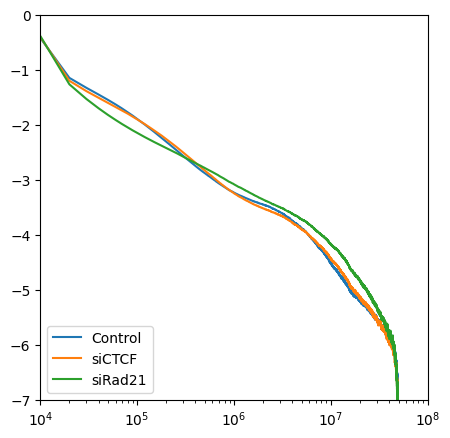

In [5]:
plt.figure(figsize=(5, 5))
for i, sample in enumerate(samplelist):
    plt.plot(logJdata.T[sample], label=sample)

plt.xscale('log')
plt.xlim(1e+4,1e+8)
plt.ylim(-7,0)

plt.legend(loc="lower left")

To compare the difference in perturbation between knockdown samples, it is useful to plot the contact frequency subtracted by the 'control' sample.

The obtained plot suggests that in siRad21, contact frequency decreases at the TAD scale and increases at the compartment scale.

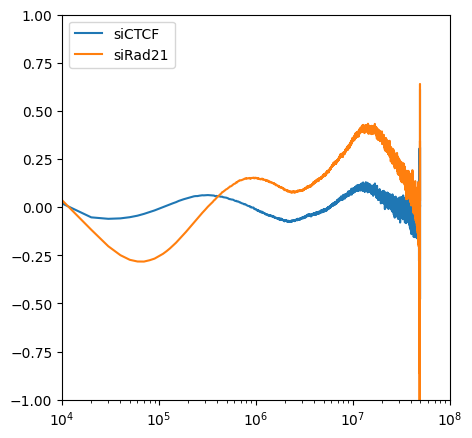

In [6]:
plt.figure(figsize=(5, 5))
for i, sample in enumerate(samplelist[1:]):
    plt.plot(logJdata.T[sample] - logJdata.T['Control'], label=sample)

plt.xscale('log')
plt.xlim(1e+4,1e+8)
plt.ylim(-1,1)

plt.legend(loc="upper left")

## log-scale bin

Since the contact frequency is very low at the long distance, it is also beneficial to plot the contact distance distribution with the bin sizes adjusted by the log scale (i.e., larger bin sizes at the longer distance).
The distribution data is available in the `distance_vs_count.10kb.MAPQ30.log.txt` in the `distance` directory.

In [9]:
dfarray = []
for sample in samplelist:
    path = f'CustardPyResults_Hi-C/Juicer_hg38/{sample}/distance/distance_vs_count.MAPQ30.log.txt'
    df = pd.read_csv(path, sep="|", header=None, index_col=0)
    df = df/df.sum()
    df.columns = [sample]
    dfarray.append(df)

Jdata = pd.concat(dfarray, axis=1)

def f_str(x):
    return int(str(x).split('-')[1])

Jdata.index =Jdata.index.map(f_str)
Jdata = Jdata.T
Jdata

,38,49,62,78,99,124,157,198,250,315,...,31622775,39810716,50118722,63095733,79432822,99999999,125892540,158489318,199526230,251188642
Control,0.000015,0.000062,0.000204,0.000440,0.000714,0.001015,0.001770,0.003336,0.007306,0.016427,...,0.013897,0.010962,0.008368,0.005970,0.004328,0.003171,0.002690,0.002140,0.001535,0.000750
siCTCF,0.000012,0.000055,0.000194,0.000408,0.000691,0.001037,0.001942,0.003988,0.009664,0.024375,...,0.013793,0.011830,0.009795,0.007466,0.005428,0.003751,0.002933,0.002160,0.001504,0.000681
siRad21,0.000022,0.000069,0.000211,0.000436,0.000717,0.001024,0.001771,0.003270,0.006985,0.015747,...,0.021520,0.019387,0.017040,0.014292,0.011054,0.007734,0.005633,0.003672,0.002135,0.000821


The result looks like the difference between the samples at each scale is clearer.

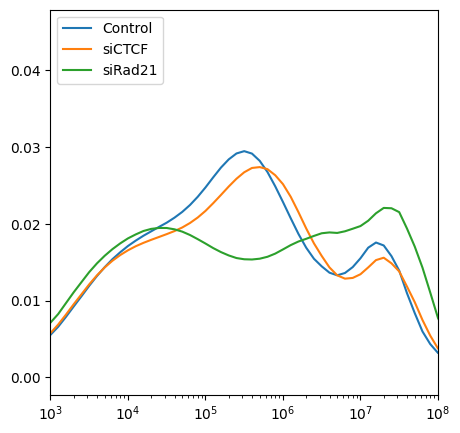

In [10]:
plt.figure(figsize=(5, 5))
for i, sample in enumerate(samplelist):
    plt.plot(Jdata.T[sample], label=sample)

plt.xscale('log')
plt.xlim(1e+3,1e+8)
#plt.ylim(-1,1)

plt.legend(loc="upper left")

If the number of samples is large (more than six), it would be difficult to distinguish each sample in the line chart.
In this case, it is also good to show the distribution with the heatmap, as shown below.

[None, None, None]

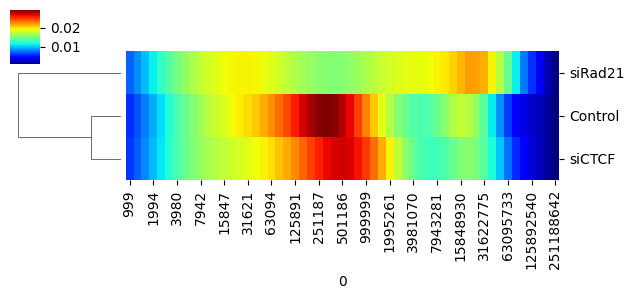

In [11]:
g = sns.clustermap(Jdata.iloc[:,14:70], cmap='jet', figsize=(6, 3), col_cluster=False)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0) 